In [1]:
pip install pandas matplotlib scikit-learn openpyxl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [4]:
file_path = '/DebtorsOverDue_16.06.2025.xlsx'  # Make sure it's in the same directory
excel_data = pd.ExcelFile(file_path)

In [5]:
df_raw = excel_data.parse('DATA', skiprows=4)

In [6]:
df_raw.columns = ['Sale Bill No.', 'Bill Date', 'Total Days', 'Due Days', 'Bill Amount',
                  'Due Amount', 'Blank1', 'Executive', '0 - 75 Days', '76 - 90 Days', '> 90 Days']

In [7]:
df_clean = df_raw[df_raw['Bill Amount'].notnull() & df_raw['Bill Date'].notnull()]
df_clean['Bill Date'] = pd.to_datetime(df_clean['Bill Date'], errors='coerce')
df_clean['Bill Amount'] = pd.to_numeric(df_clean['Bill Amount'], errors='coerce')
df_clean.dropna(subset=['Bill Date', 'Bill Amount'], inplace=True)

<ipython-input-7-865945173>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Bill Date'] = pd.to_datetime(df_clean['Bill Date'], errors='coerce')
<ipython-input-7-865945173>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Bill Amount'] = pd.to_numeric(df_clean['Bill Amount'], errors='coerce')
<ipython-input-7-865945173>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [8]:
df_clean['Month'] = df_clean['Bill Date'].dt.to_period('M').dt.to_timestamp()
monthly_sales = df_clean.groupby('Month')['Bill Amount'].sum().reset_index()

<ipython-input-8-1518799690>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Month'] = df_clean['Bill Date'].dt.to_period('M').dt.to_timestamp()


In [9]:
monthly_sales['Month_Ordinal'] = np.arange(len(monthly_sales))
X = monthly_sales['Month_Ordinal'].values.reshape(-1, 1)
y = monthly_sales['Bill Amount'].values

In [10]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [11]:
future_months = np.arange(len(monthly_sales), len(monthly_sales) + 3).reshape(-1, 1)
future_sales = model.predict(future_months)
future_dates = pd.date_range(start=monthly_sales['Month'].max() + pd.offsets.MonthBegin(1), periods=3, freq='MS')
forecast_df = pd.DataFrame({'Month': future_dates, 'Predicted Sales': future_sales})

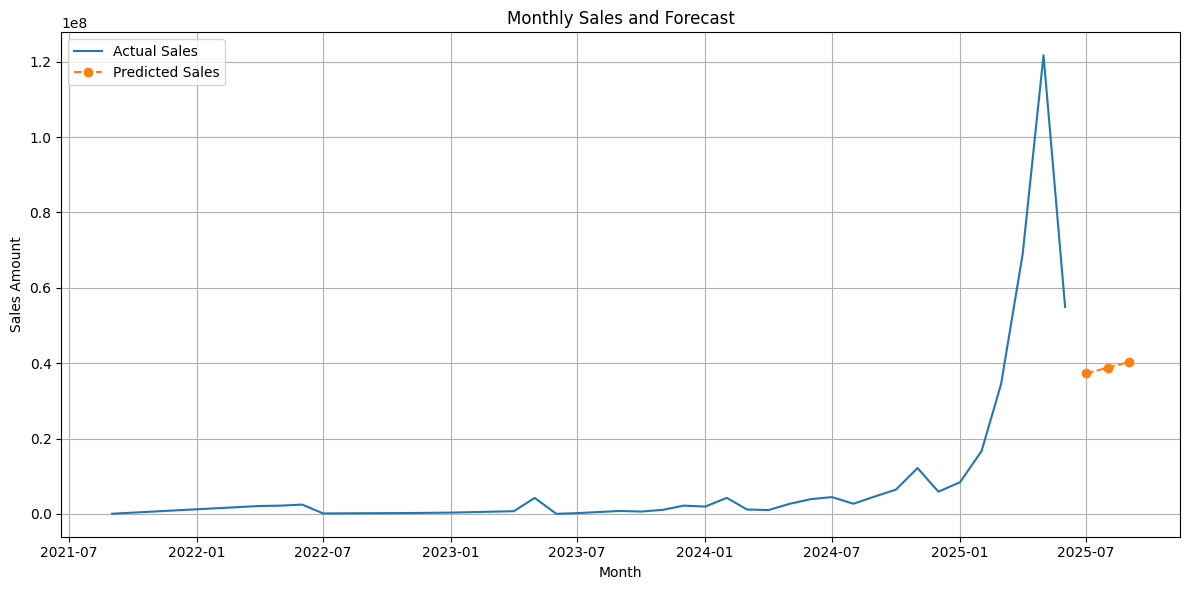

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Bill Amount'], label='Actual Sales')
plt.plot(forecast_df['Month'], forecast_df['Predicted Sales'], label='Predicted Sales', linestyle='--', marker='o')
plt.title('Monthly Sales and Forecast')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
print("\nUpcoming 3 Months Predicted Sales:\n")
print(forecast_df)


Upcoming 3 Months Predicted Sales:

       Month  Predicted Sales
0 2025-07-01     3.726904e+07
1 2025-08-01     3.879536e+07
2 2025-09-01     4.032168e+07
